In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')


In [131]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

Heart Disease

- age: The person's age in years
- sex: The person's sex (1 = male, 0 = female)
- cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- trestbps: The person's resting blood pressure (mm Hg on admission tot he hospital)
- chol: The person's cholesterol measurement in mg/dl
- fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true, 0 = false)
- restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or - definite left ventricular hypertrophy by Estes' criteria)
- thalachm: The person's maximum heart rate achieved
- exang: Exercise induced angina (1 = yes, 0 = no)
- oldpeak = ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)
- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca: The number of major vessels (0-3) colored by flourosopy
- thal: A blood disorder called thalassemia (3 = normal, 6 = fixed defect, 7 = reversable defect)
- target: Heart disease (0 = no, 1 = yes)


- The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.
- https://deepchecks.com/what-is-data-cleaning
- https://towardsdatascience.com/2-types-of-duuplicate-features-in-machine-learning-2931de6c949b

In [132]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [134]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [135]:
df.duplicated().sum()

723

In [136]:
hd = df.drop_duplicates()
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [137]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [138]:
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot: >

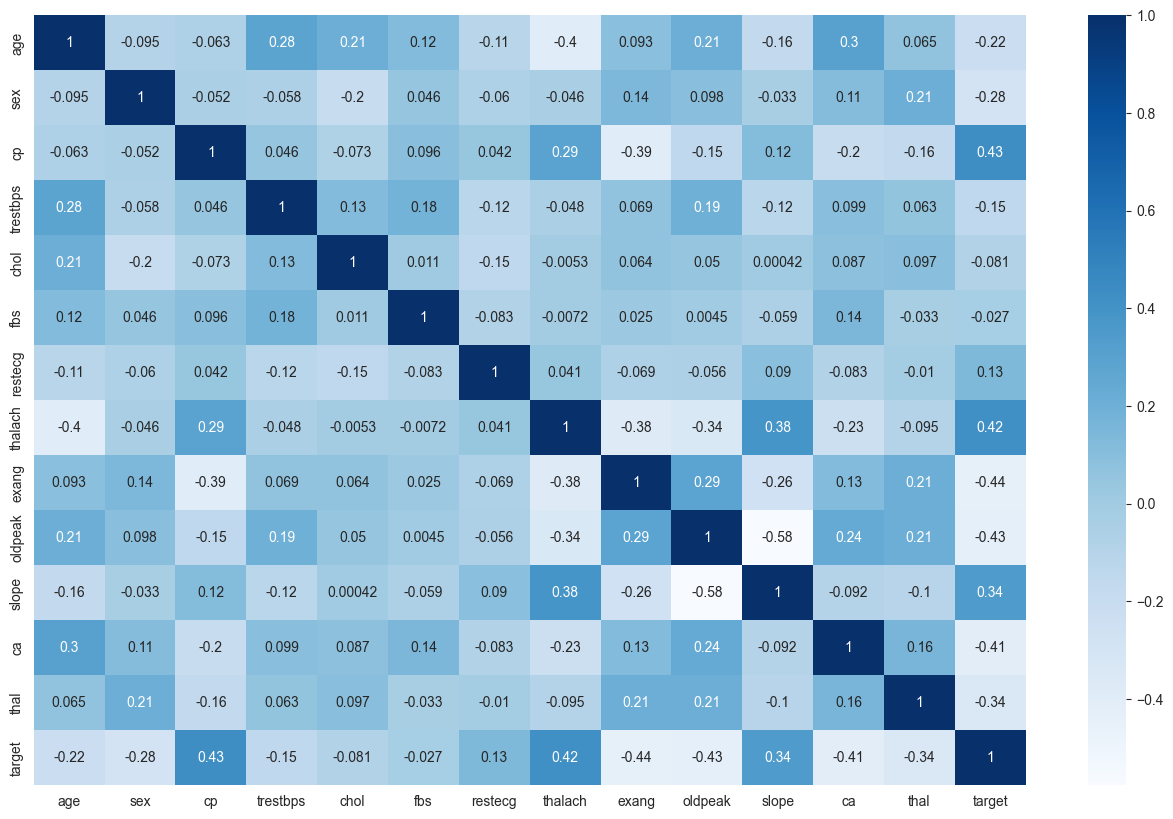

In [139]:
plt.figure(figsize = (16,10))
sns.heatmap(hd.corr(), annot = True, cmap = 'Blues')

In [140]:
hd.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [141]:
for c in hd.columns:
    print(f"{c}: {hd[c].nunique()}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [142]:
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

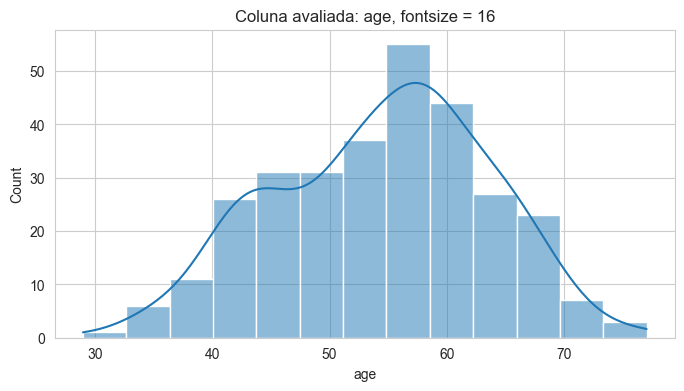

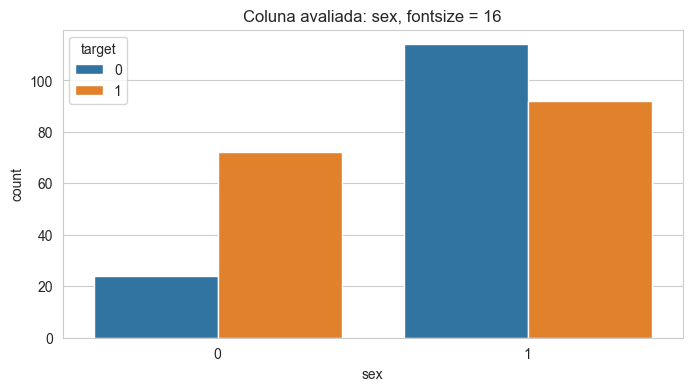

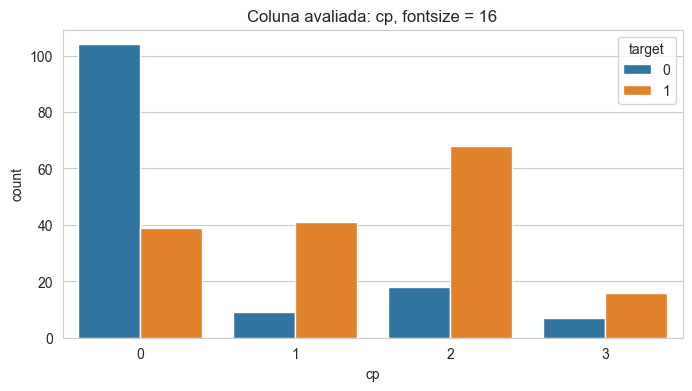

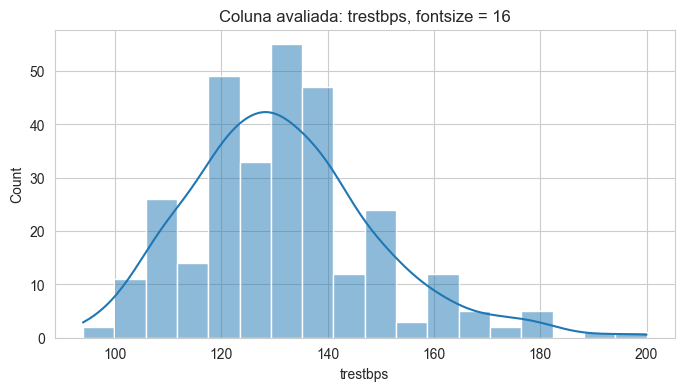

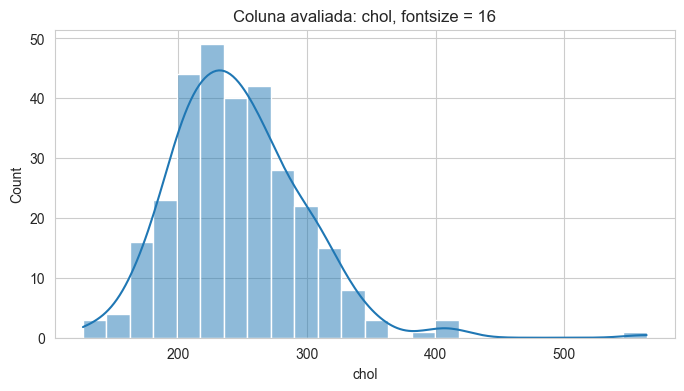

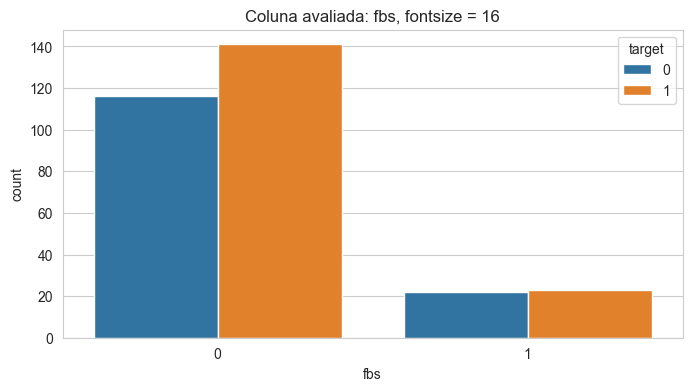

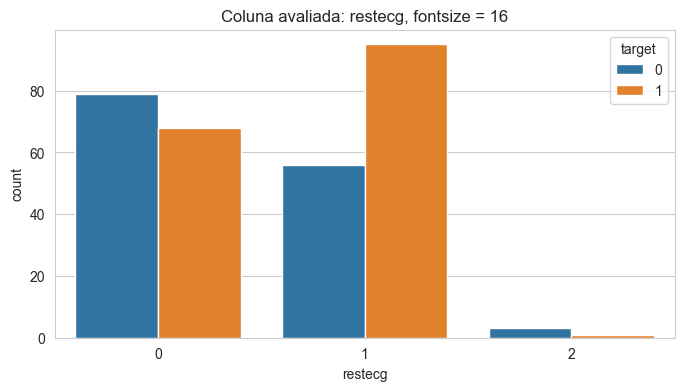

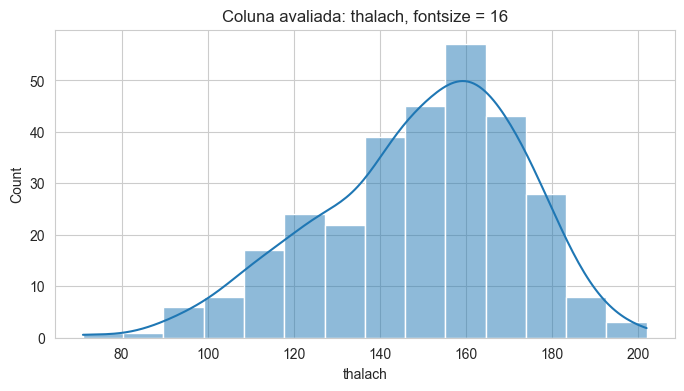

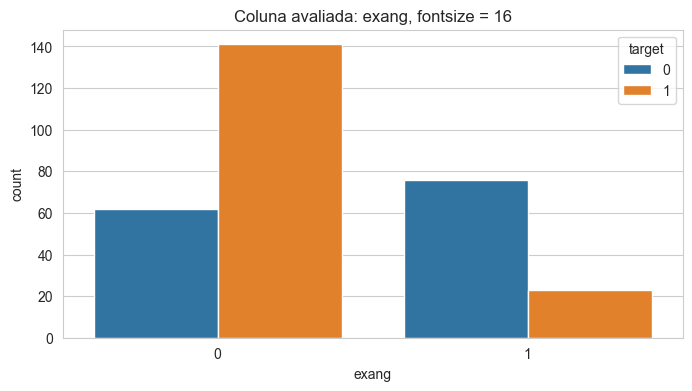

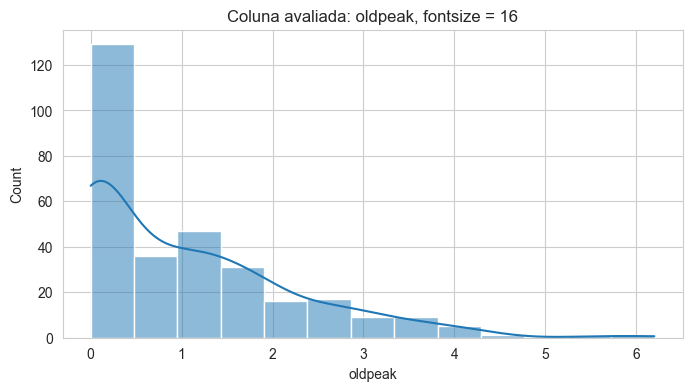

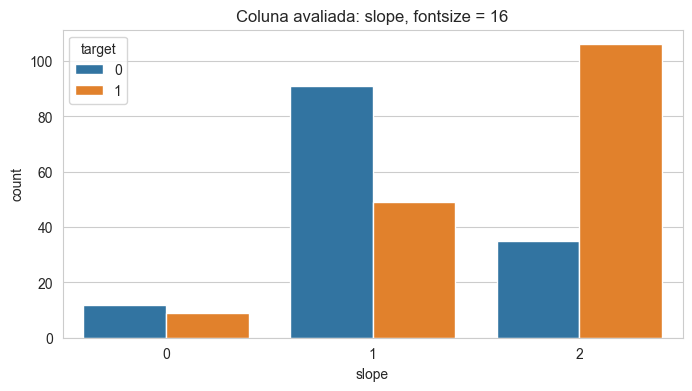

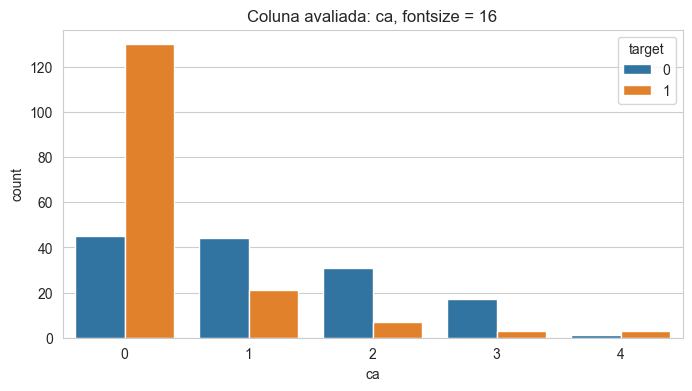

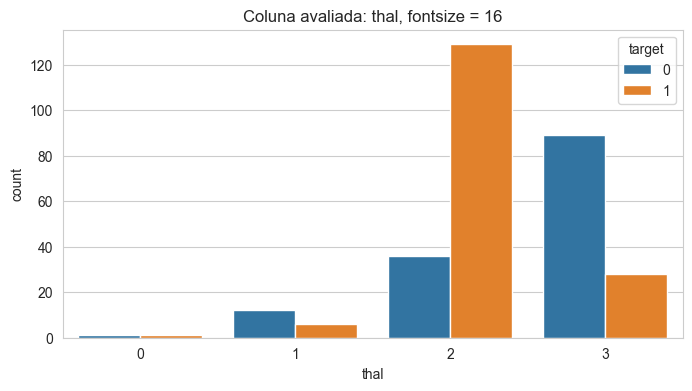

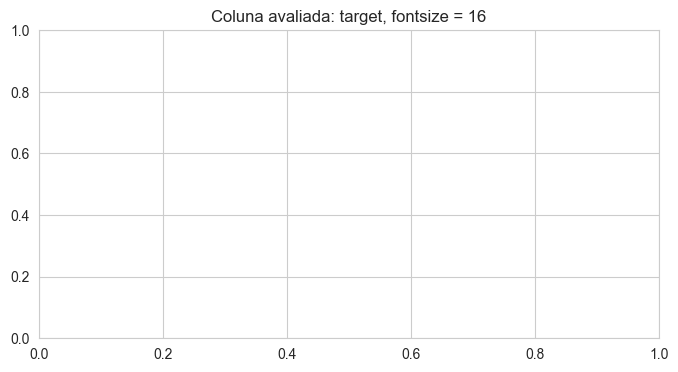

In [143]:
for c in  hd.columns:
    plt.figure(figsize = (8,4))
    plt.title(f"Coluna avaliada: {c}, fontsize = 16")
    if c in categoricas:
        sns.countplot(x = hd[c], hue = hd['target'])
    if c in numericas:
        sns.histplot(hd[c], kde = True)

Removing Outliers

<AxesSubplot: >

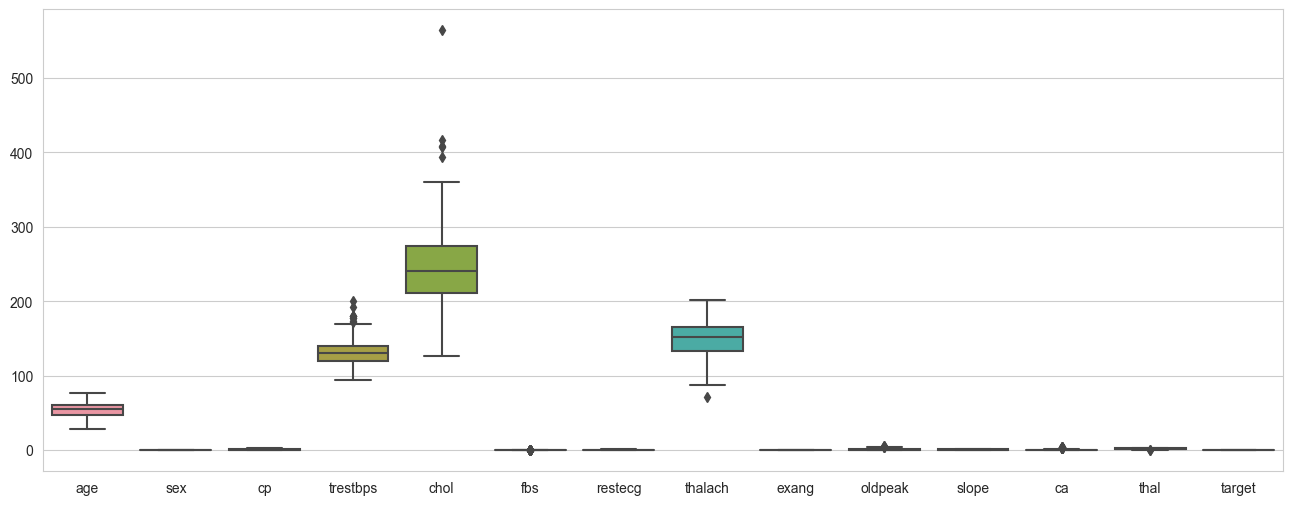

In [144]:
plt.figure(figsize = (16,6))
sns.boxplot(data = hd)

In [145]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [146]:
hd['trestbps'].quantile(0.99)

180.0

In [147]:
hd1 = hd[hd["trestbps"] < hd["trestbps"].quantile(0.99)]

<AxesSubplot: >

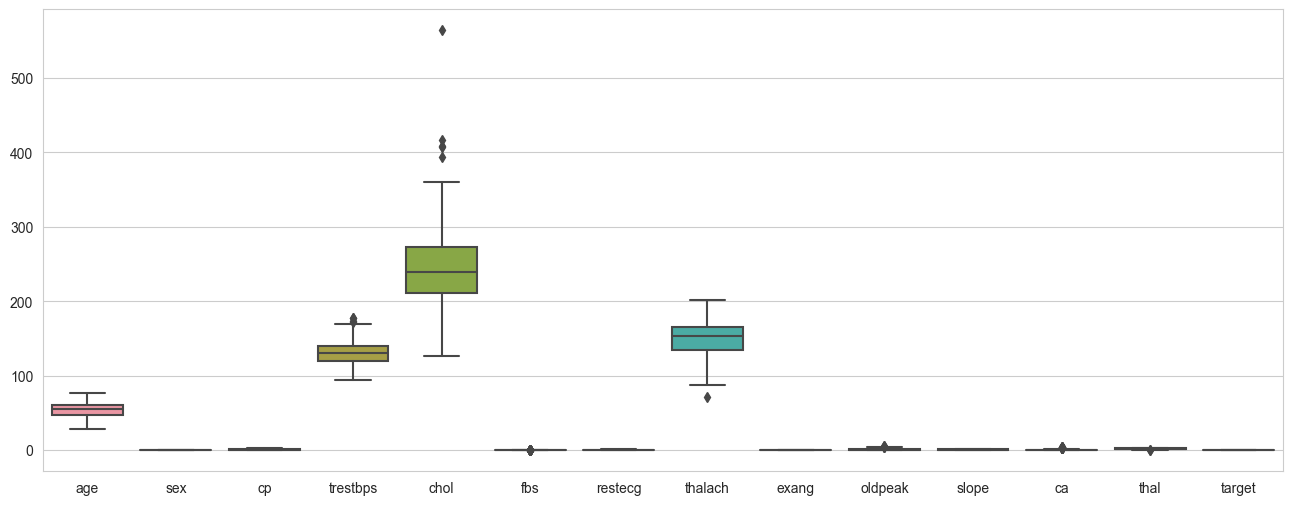

In [148]:
plt.figure(figsize = (16,6))
sns.boxplot(data = hd1)

In [149]:
hd1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.336700,0.686869,0.969697,130.680135,245.609428,0.144781,0.525253,149.565657,0.319865,1.030303,1.400673,0.720539,2.309764,0.548822
std,9.071847,0.464550,1.034420,16.154304,51.645776,0.352474,0.520072,22.844729,0.467211,1.146686,0.613254,1.009758,0.613755,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [150]:
hd1['chol'].quantile(0.98)

354.4799999999999

In [151]:
hd2 = hd1[hd1["chol"] < hd1["chol"].quantile(0.98)]

<AxesSubplot: >

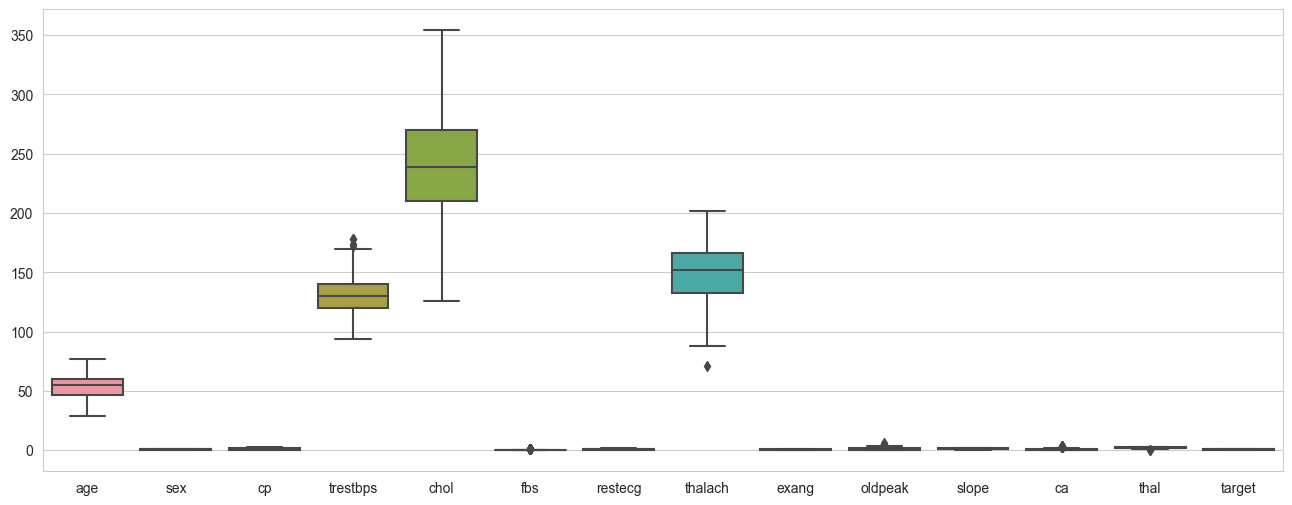

In [152]:
plt.figure(figsize = (16,6))
sns.boxplot(data = hd2)

In [153]:
hd2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,54.158076,0.701031,0.969072,130.491409,241.907216,0.144330,0.536082,149.457045,0.323024,1.016151,1.402062,0.714777,2.305842,0.546392
std,9.064278,0.458595,1.035111,16.142761,44.214699,0.352029,0.519851,23.061553,0.468437,1.143368,0.615766,1.005719,0.615266,0.498701
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,166.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [154]:
hd2['thalach'].quantile(0.005)

88.9

In [155]:
hd3 = hd2[hd2['thalach'] > hd2['thalach'].quantile(0.005)]

<AxesSubplot: >

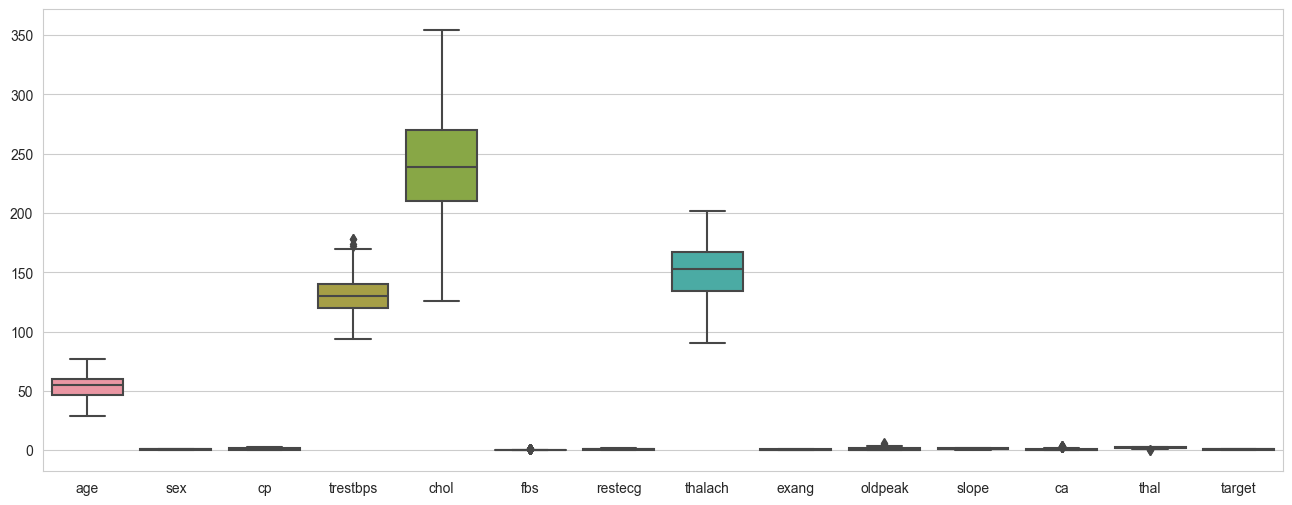

In [156]:
plt.figure(figsize = (16,6))
sns.boxplot(data = hd3)

In [157]:
hd3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.103806,0.698962,0.975779,130.453287,241.813149,0.145329,0.532872,149.941176,0.321799,1.015571,1.404844,0.716263,2.304498,0.550173
std,9.062454,0.459505,1.035533,16.137174,44.326594,0.353043,0.520209,22.378685,0.467977,1.147279,0.616985,1.008185,0.615777,0.498339
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,167.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [158]:
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [159]:
hd4 = pd.get_dummies(hd3, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
hd4

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
733,44,108,141,175,0.6,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
739,52,128,255,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
843,59,160,273,125,0.0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [160]:
X = hd4.drop('target', axis = 1)
y = hd4['target']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [162]:
log = LogisticRegression(max_iter=10000)

In [163]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [164]:
log.score(X_train, y_train)

0.8744588744588745

In [165]:
log.score(X_test, y_test)

0.8448275862068966

In [166]:
####
y_previsto = log.predict(X_test)
y_previsto

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [167]:
accuracy_score(y_test, y_previsto)

0.8448275862068966

In [168]:
print(classification_report(y_test,y_previsto))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58



In [169]:
confusion_matrix(y_test, y_previsto)

array([[18,  6],
       [ 3, 31]], dtype=int64)

In [170]:
##########################################################

In [171]:
def relatorio_ml(df, algoritmo, opt = 2):
    X = df.drop('target', axis = 1)
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

    if opt == 0:
        ml = algoritmo(max_iter = 10000)
    elif opt == 1:
        ml = algoritmo(n_estimators = 10000)
    elif opt == 2:
        ml = algoritmo()

    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f"Acurácia treino: {score_train * 100:.2f}%")
    score_test = ml.score(X_test, y_test)
    print(f"Acurácia teste: {score_test * 100:.2f}%")

    y_previsto = log.predict(X_test)
    print("--- CLASSIFICATION REPORT ---")
    print(classification_report(y_test, y_previsto))
    print("--- CONFUSION MATRIX ---")
    confusao = confusion_matrix(y_test, y_previsto)
    sns.heatmap(confusao, annot = True, cmap = 'Blues')

    return score_train, score_test

Acurácia treino: 87.45%
Acurácia teste: 84.48%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


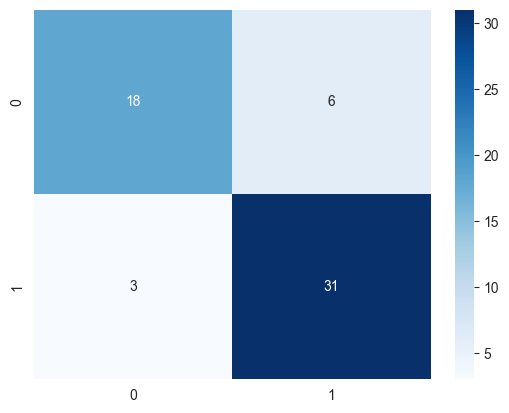

In [172]:
log_train, log_test = relatorio_ml(hd4, LogisticRegression, opt = 0)

Acurácia treino: 100.00%
Acurácia teste: 65.52%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


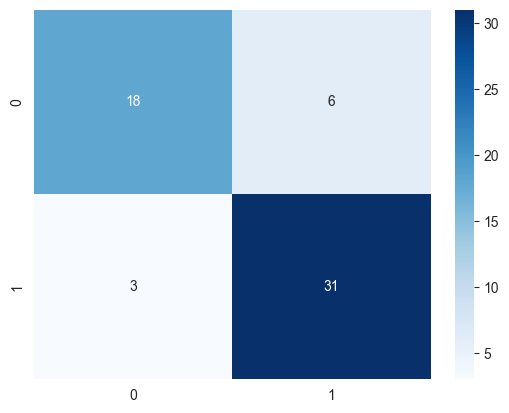

In [173]:
tree_train, tree_test = relatorio_ml(hd4, DecisionTreeClassifier)

Acurácia treino: 93.51%
Acurácia teste: 82.76%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


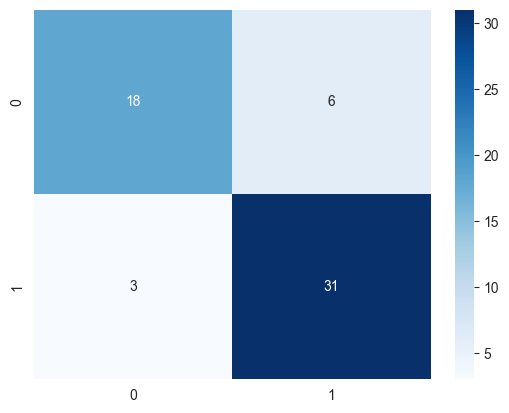

In [174]:
ada_train, ada_test = relatorio_ml(hd4, AdaBoostClassifier)

Acurácia treino: 100.00%
Acurácia teste: 79.31%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


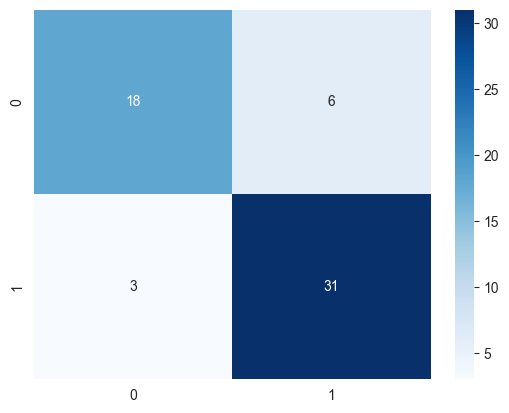

In [175]:
rand_train, rand_test = relatorio_ml(hd4, RandomForestClassifier)

In [176]:
data = { 'Models' : ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier', 'Ada Boost'],
         'Acurácia Treino' : [round(log_train * 100, 2), round(tree_train * 100, 2), round(rand_train * 100, 2),
                            round(ada_train * 100, 2)],
         'Acurácia Teste': [round(log_test * 100, 2), round(tree_test * 100, 2), round(rand_test * 100, 2),
                          round(ada_test * 100, 2)]
        }

df = pd.DataFrame(data)
df.sort_values(by='Acurácia Teste', ascending=False, inplace = True)
df

,Models,Acurácia Treino,Acurácia Teste
0,Logistic Regression,87.45,84.48
3,Ada Boost,93.51,82.76
2,Random Forest Classifier,100.00,79.31
1,Decision Tree,100.00,65.52


In [177]:
def relatorio_ml_scaler(df, algoritmo, opt = 2):
    X = df.drop('target', axis = 1)
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    cols_scaler = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    X_train[cols_scaler] = scaler.fit_transform(X_train[cols_scaler])
    X_test[cols_scaler] = scaler.transform(X_test[cols_scaler])

    if opt == 0:
        ml = algoritmo(max_iter = 10000)
    elif opt == 1:
        ml = algoritmo(n_estimators = 10000)
    elif opt == 2:
        ml = algoritmo()

    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f"Acurácia treino: {score_train * 100:.2f}%")
    score_test = ml.score(X_test, y_test)
    print(f"Acurácia teste: {score_test * 100:.2f}%")

    y_previsto = log.predict(X_test)
    print("--- CLASSIFICATION REPORT ---")
    print(classification_report(y_test, y_previsto))
    print("--- CONFUSION MATRIX ---")
    confusao = confusion_matrix(y_test, y_previsto)
    sns.heatmap(confusao, annot = True, cmap = 'Blues')

    return score_train, score_test

Acurácia treino: 87.45%
Acurácia teste: 84.48%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION MATRIX ---


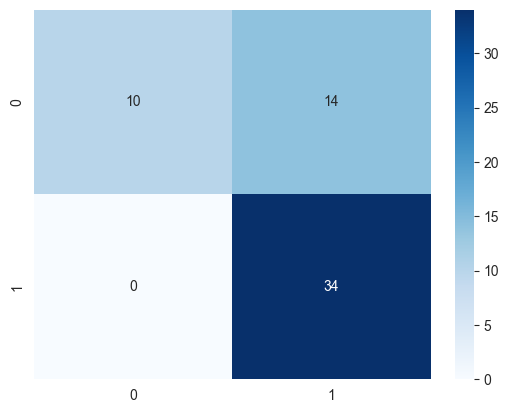

In [178]:
log_train_scaler, log_test_scaler = relatorio_ml_scaler(hd4, LogisticRegression, opt = 0)

Acurácia treino: 100.00%
Acurácia teste: 72.41%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION MATRIX ---


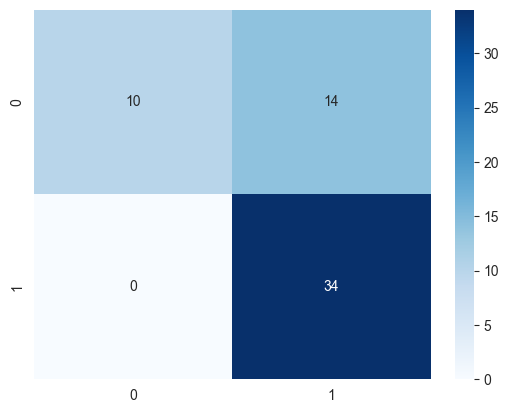

In [179]:
tree_train_scaler, tree_test_scaler = relatorio_ml_scaler(hd4, DecisionTreeClassifier)

Acurácia treino: 93.51%
Acurácia teste: 82.76%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION MATRIX ---


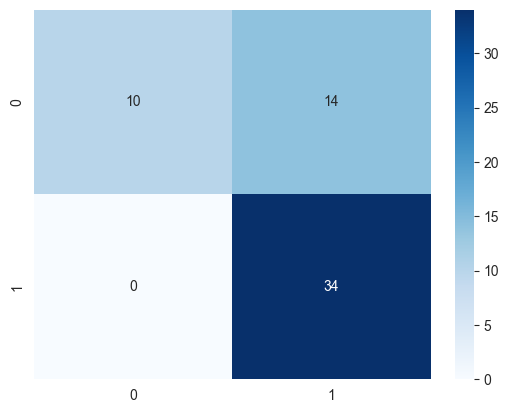

In [180]:
ada_train_scaler, ada_test_scaler = relatorio_ml_scaler(hd4, AdaBoostClassifier)

Acurácia treino: 100.00%
Acurácia teste: 77.59%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION MATRIX ---


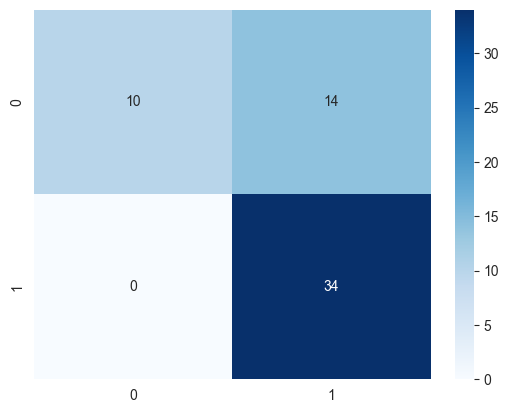

In [181]:
rand_train_scaler, rand_test_scaler = relatorio_ml_scaler(hd4, RandomForestClassifier)

In [182]:
data_scaler = { 'Models' : ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier', 'Ada Boost'],
         'Acurácia Treino' : [round(log_train_scaler * 100, 2), round(tree_train_scaler * 100, 2), round(rand_train_scaler * 100, 2),
                            round(ada_train_scaler * 100, 2)],
         'Acurácia Teste': [round(log_test_scaler * 100, 2), round(tree_test_scaler * 100, 2), round(rand_test_scaler * 100, 2),
                          round(ada_test_scaler * 100, 2)]
        }

df_scaler = pd.DataFrame(data_scaler)
df_scaler.sort_values(by='Acurácia Teste', ascending=False, inplace = True)
df_scaler

,Models,Acurácia Treino,Acurácia Teste
0,Logistic Regression,87.45,84.48
3,Ada Boost,93.51,82.76
2,Random Forest Classifier,100.00,77.59
1,Decision Tree,100.00,72.41


In [183]:
df

,Models,Acurácia Treino,Acurácia Teste
0,Logistic Regression,87.45,84.48
3,Ada Boost,93.51,82.76
2,Random Forest Classifier,100.00,79.31
1,Decision Tree,100.00,65.52
